## 抓取半導體業EPS 資訊

In [2]:
import requests
url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb19'
payload = {
    'encodeURIComponent':'1',
    'step':'1',
    'firstin':'1',
    'TYPEK':'sii',
    'code':'24',
    'year':'105',
    'season':'01'
}
res = requests.post(url , data = payload)

In [7]:
res.encoding = 'utf-8'
#res.text

## 使用Pandas 讀取表格資料

In [22]:
import pandas
dfs = pandas.read_html(res.text, header=0)

In [23]:
type(dfs)

list

In [24]:
len(dfs)

1

In [25]:
stockdf = dfs[0]

In [26]:
type(stockdf)

pandas.core.frame.DataFrame

In [27]:
stockdf.columns

Index(['公司代號', '公司名稱', '產業別', '基本每股盈餘(元)', '普通股每股面額', '營業收入', '營業利益',
       '營業外收入及支出', '稅後淨利'],
      dtype='object')

In [35]:
# contains 檢查理面有沒有包含特定文字
stockdf['公司代號'].str.contains('基本').head()

0    False
1     True
2    False
3    False
4    False
Name: 公司代號, dtype: bool

## 使用正規表達法篩選資料

In [76]:
# match 可以允許你使用正規表達法檢查
#stockdf['公司代號'].str.match('^[0-9]')
stockdf = stockdf[stockdf['公司代號'].str.match('^[0-9]')]
stockdf.head(3)

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
0,6415,矽力杰股份有限公司,半導體業,3.09,新台幣 10.0000元,1317347.0,234500.0,14642.0,238548.0
2,2454,聯發科技股份有限公司,半導體業,2.79,新台幣 10.0000元,55905486.0,4403092.0,875095.0,4472987.0
3,2330,台灣積體電路製造股份有限公司,半導體業,2.50,新台幣 10.0000元,203495361.0,70467314.0,1788585.0,64792597.0


## 抓取所有上市公司EPS 資訊

In [1]:
import requests
import pandas
url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb19'
payload = {
    'encodeURIComponent':'1',
    'step':'1',
    'firstin':'1',
    'TYPEK':'sii',
    'code':'',
    'year':'105',
    'season':'01'
}
res = requests.post(url , data = payload)
res.encoding = 'utf-8'
dfs = pandas.read_html(res.text, header=0)

In [2]:
len(dfs)

28

In [6]:
dfall = []
for df in dfs:
    df = df[df['公司代號'].str.match('^[0-9]')]
    dfall.append(df)

In [7]:
len(dfall)

28

In [8]:
stockdf = pandas.concat(dfall, ignore_index=True)

## 使用Pandas 做分析

In [9]:
stockdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 9 columns):
公司代號         888 non-null object
公司名稱         888 non-null object
產業別          888 non-null object
基本每股盈餘(元)    888 non-null float64
普通股每股面額      888 non-null object
營業收入         888 non-null float64
營業利益         888 non-null object
營業外收入及支出     888 non-null object
稅後淨利         888 non-null float64
dtypes: float64(3), object(6)
memory usage: 62.5+ KB


In [111]:
stockdf.describe()

,基本每股盈餘(元),營業收入,稅後淨利
count,888.000000,8.880000e+02,8.880000e+02
mean,0.512703,7.343384e+06,3.902492e+05
std,1.245745,3.770393e+07,2.623865e+06
min,-3.170000,4.900000e+01,-8.581508e+06
25%,0.020000,5.011640e+05,4.496000e+03
50%,0.270000,1.225597e+06,6.074100e+04
75%,0.802500,3.612438e+06,2.072038e+05
max,27.010000,9.580092e+08,6.479260e+07


In [112]:
stockdf['營業收入'].max()

958009217.0

In [113]:
#stockdf['營業收入'] == stockdf['營業收入'].max()
stockdf[stockdf['營業收入'] == stockdf['營業收入'].max()]

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
857,2317,鴻海精密工業股份有限公司,其他電子業,1.76,新台幣 10.0000元,958009217.0,3.53247e+07,981284,27548860.0


In [114]:
stockdf[stockdf['營業收入'] == stockdf['營業收入'].min()]

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
262,1438,裕豐國際開發股份有限公司,建材營造,-0.01,新台幣 10.0000元,49.0,-2243,821,-1422.0


In [115]:
# SELECT * FROM stcodf ORDER BY 營業收入 LIMIT 3
stockdf.sort_values('營業收入').head(3)

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
262,1438,裕豐國際開發股份有限公司,建材營造,-0.01,新台幣 10.0000元,49.0,-2243,821,-1422.0
269,2528,皇普建設股份有限公司,建材營造,-0.08,新台幣 10.0000元,66.0,-8311,-1947,-10258.0
608,2424,隴華電子股份有限公司,電腦及週邊設備業,-0.42,新台幣 10.0000元,1543.0,-5467,-8086,-12628.0


In [16]:
# SELECT * FROM stcodf ORDER BY 營業收入 DESC LIMIT 3
stockdf.sort_values('營業收入', ascending=False).head(3)

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
857,2317,鴻海精密工業股份有限公司,其他電子業,1.76,新台幣 10.0000元,958009217.0,3.53247e+07,981284,27548860.0
562,4938,和碩聯合科技股份有限公司,電腦及週邊設備業,1.58,新台幣 10.0000元,256382310.0,6.77579e+06,-274616,4841286.0
484,2330,台灣積體電路製造股份有限公司,半導體業,2.50,新台幣 10.0000元,203495361.0,7.04673e+07,1.78858e+06,64792597.0


In [122]:
# SELECT 產業別, SUM('營業收入') FROM stockdf GROUP BY '產業別'
stockdf.groupby('產業別')['營業收入'].sum().sort_values(ascending=False)

產業別
電腦及週邊設備業    1.258632e+09
其他電子業       1.067066e+09
金融保險業       5.887326e+08
半導體業        5.245071e+08
電子通路業       3.280177e+08
光電業         3.100052e+08
電子零組件業      2.882352e+08
塑膠工業        2.491992e+08
通信網路業       2.201759e+08
其他          1.925858e+08
航運業         1.764076e+08
食品工業        1.646163e+08
貿易百貨        1.560951e+08
鋼鐵工業        1.438673e+08
油電燃氣業       1.347268e+08
紡織纖維        1.216846e+08
電機機械        1.055176e+08
汽車工業        1.027299e+08
建材營造        6.800162e+07
化學工業        6.420342e+07
電器電纜        5.689345e+07
橡膠工業        5.544802e+07
造紙工業        3.833490e+07
水泥工業        3.466540e+07
生技醫療業       2.434520e+07
觀光事業        2.178487e+07
玻璃陶瓷        1.302729e+07
資訊服務業       1.141810e+07
Name: 營業收入, dtype: float64

## 使用Pandas 繪圖

Populating the interactive namespace from numpy and matplotlib


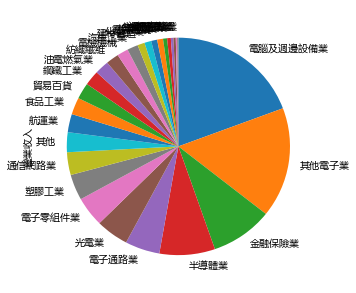

In [13]:
revenue_sum = stockdf.groupby('產業別')['營業收入'].sum().sort_values(ascending=False)
% pylab inline

revenue_sum.plot(kind = 'pie', figsize=[5,5], startangle = 90, counterclock = False)


In [15]:
?revenue_sum.plot

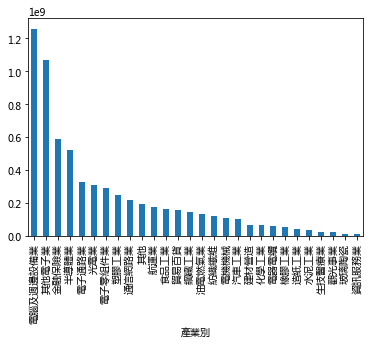

In [14]:
revenue_sum.plot(kind = 'bar')


## 抓取多個季別的EPS資訊

In [27]:
import requests
url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb19'
payload = {
    'encodeURIComponent':'1',
    'step':'1',
    'firstin':'1',
    'TYPEK':'sii',
    'code' :'24',
    'year' :'105',
    'season':'01'
}

def getEPS(year, season):
    payload['year']   = year
    payload['season'] = season
    res = requests.post(url , data = payload)
    res.encoding = 'utf-8'
    dfs = pandas.read_html(res.text, header=0)
    df = dfs[0]
    df = df[df['公司代號'].str.match('^[0-9]')]
    df['year'] = year
    df['season'] = season
    return df
    
df  = getEPS('105', '01')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
dftotal = []
seasons = ['01', '02', '03', '04']
for year in range(102, 106):
    for season in seasons:
        dftotal.append(getEPS(year, season))
        print(year, season)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


102 01
102 02
102 03
102 04
103 01
103 02
103 03
103 04
104 01
104 02
104 03
104 04
105 01
105 02
105 03
105 04


In [33]:
len(dftotal)

16

In [34]:
stockdf = pandas.concat(dftotal, ignore_index=True)

In [35]:
stockdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 11 columns):
公司代號         1110 non-null object
公司名稱         1110 non-null object
產業別          1110 non-null object
基本每股盈餘(元)    1110 non-null float64
普通股每股面額      1110 non-null object
營業收入         1110 non-null float64
營業利益         1110 non-null float64
營業外收入及支出     1110 non-null float64
稅後淨利         1110 non-null float64
year         1110 non-null int64
season       1110 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 95.5+ KB


In [38]:
tw2330 = stockdf[stockdf['公司代號'] == '2330']

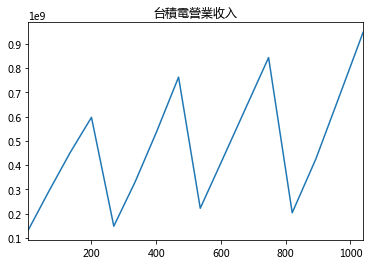

In [48]:
tw2330['營業收入'].plot(kind = 'line', title = "台積電營業收入")

## 正規表達法

In [41]:
a = '0912345678'
b = '0922333444'
c = '0955-111-222'
d = '0955-111333'

In [42]:
a == '0912345678'

True

In [50]:
import re
a = '3'
re.search('3' , a )
re.search('4' , a ) # match nothing
re.search('[0123456789]', a) # match 0 or 1 or 2 or 3 or 4 or 5 or 6 or ... or 9
re.search('[0-9]', a) # [0-9] == [0123456789]
re.search('\d', a) # \d == [0-9] == [0123456789]

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [54]:
a = 'q'
re.search('[abcdefghijklmnopqrstuvwxyz]', a) # a or b or c or ... z
re.search('[a-z]', a) # [a-z] == [abcdefghijklmnopqrstuvwxyz]
a = 'Q'
re.search('[a-z]', a) # match nothing
re.search('[a-zA-Z]', a) 
a = '5'
re.search('\w', a) # \w == [a-zA-Z0-9]

<_sre.SRE_Match object; span=(0, 1), match='5'>

In [61]:
a = 'apple'
re.search('\w{5}', a)  # match exact 5 character
re.search('\w{3,8}', a)  # match at least 3 character, at most 8 characters
re.search('\w{0,}', a) # match at least 0 character
re.search('\w*', a) # * == {0,}
re.search('\w{1,}', a) # match at least 1 character
re.search('\w+', a) # + == {1,}

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [70]:
phones = ['0912345678', '0922333444', '0955-111-222', '0955-111333', 'a1112222333', '1112222333b']

for phone in phones: 
    #m = re.search('\d{10}', phone)
    #m = re.search('\d{4}-\d{3}-\d{3}', phone)
    #m = re.search('\d{4}-{0,1}\d{3}-{0,1}\d{3}', phone)
    #m = re.search('\d{4}-?\d{3}-?\d{3}', phone) # ? == {0,1}
    #m = re.search('^\d{4}-?\d{3}-?\d{3}', phone) # ^ match begin
    m = re.search('^\d{4}-?\d{3}-?\d{3}$', phone) # $ match end
    print(m)

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 10), match='0922333444'>
<_sre.SRE_Match object; span=(0, 12), match='0955-111-222'>
<_sre.SRE_Match object; span=(0, 11), match='0955-111333'>
None
None


## 圖表資料抓取

In [51]:
import requests
res = requests.get('https://statementdog.com/analysis/analysis_ajax/2330/2012/1/2017/4/1?queried_by_user=true&_=1493525134598')
jd = res.json()

In [61]:
data = pandas.DataFrame(jd['11']['data']['month']['data'])
data.columns = ['idx', 'price']
data.head()

,idx,price
0,0,76.4
1,1,78.13
2,2,82.25
3,3,84.28
4,4,83.94


In [63]:
axis = pandas.DataFrame(jd['11']['data']['month']['axis'])
axis.columns = ['idx2', 'yearmonth']
axis.head()

,idx2,yearmonth
0,0,201201
1,1,201202
2,2,201203
3,3,201204
4,4,201205


In [67]:
# axis = 1, concat by columns
stockdf = pandas.concat([axis, data], axis=1)

In [69]:
# get yearmonth and price only
stockdf = stockdf[['yearmonth', 'price']]

In [74]:
# change year month to datetime format, and assign to index
stockdf.index = pandas.to_datetime(stockdf['yearmonth'], format = '%Y%m')

In [81]:
stockdf.head()

,yearmonth,price
yearmonth,,
2012-01-01,201201,76.40
2012-02-01,201202,78.13
2012-03-01,201203,82.25
2012-04-01,201204,84.28
2012-05-01,201205,83.94


In [78]:
# convert type of price from object to float
stockdf['price'] = stockdf['price'].astype(float)

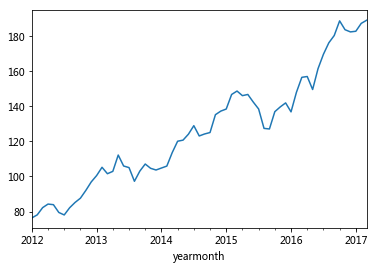

In [79]:
# plot line chart
stockdf['price'].plot(kind = 'line')

In [88]:
stockdf['mvg3']= stockdf['price'].rolling(window= 3).mean()

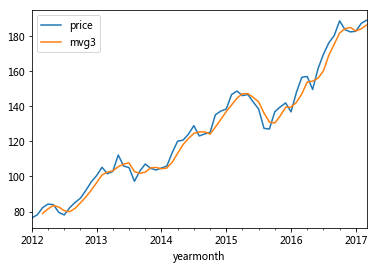

In [89]:
# plot line chart
stockdf[['price', 'mvg3']].plot(kind = 'line')

## 抓乙太幣資訊

In [95]:
import requests
url = 'https://www.maicoin.com/zh-TW/trade_summaries/eth?from=2016-10-30+12%3A28%3A36+%2B0800'
headers = {
'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',    
'X-CSRF-Token':'DLdAHVRXiB3aHTfMNDhlr0r9SXlzbCty5oZ5dJvBJ8wPHOatI9KO/iuHwhUMhAPOm8wDqv9lpTn86JHc6EVu7g==',
'X-Requested-With':'XMLHttpRequest',
'Cookie':'visid_incap_160122=A4M8eBbASIaPyLW3MJIJYNgCmFgAAAAAQUIPAAAAAAA7/GYrbtr5cmWspDT0H104; incap_ses_406_160122=nZjQBKxLIWmLw8xOwmiiBSms/VgAAAAA0m4czHtPg0qs2V4fifg5GQ==; _okdetect=%7B%22token%22%3A%2214930196967490%22%2C%22proto%22%3A%22https%3A%22%2C%22host%22%3A%22www.maicoin.com%22%7D; _ok=2909-208-10-2973; incap_ses_576_160122=Lih9QmR8Bg+J0R5VIV3+B2Su/VgAAAAAFUCyE9XInLZ6KGqR1t+wHg==; _okac=2dc9c7c45a697160aa9a474371086c3f; _okla=1; _hjIncludedInSample=1; incap_ses_200_160122=lVvIE8D05jIxARGNRIvGAmSC/1gAAAAAUCJpluS0XIucsgAadH2mTw==; _hjMinimizedPolls=50467; last_sign_in_at=2017-04-29+21%3A21%3A21+%2B0800; _okbk=cd4%3Dtrue%2Cvi5%3D0%2Cvi4%3D1493478210836%2Cvi3%3Dactive%2Cvi2%3Dfalse%2Cvi1%3Dfalse%2Ccd8%3Dchat%2Ccd6%3D0%2Ccd5%3Daway%2Ccd3%3Dfalse%2Ccd2%3D0%2Ccd1%3D0%2C; olfsk=olfsk5239368130145221; wcsid=2oAH2ywU6fYUhMzF3Z2JK0H8RE0PPobT; hblid=WFEmWdozZE4GfEAz3Z2JK5u1CH3RE0O6; _oklv=1493479241401%2C2oAH2ywU6fYUhMzF3Z2JK0H8RE0PPobT; incap_ses_627_160122=kATPYGYslUGAuJ/fRI2zCOUNBVkAAAAAeW5uFiLXoEawbI5gCmO29g==; incap_ses_401_160122=VFphQTzanTK4Hanga6SQBa5nBVkAAAAAark7up57FDFpElkuB+YPeg==; locale=InpoLVRXIg%3D%3D--a65135f98901cde92d397aef024641fac25550a3; currency=InR3ZCI%3D--6eec4eff818e386526edfcc1b4af684de0367230; _twcoin_session=RUtHZm9ZdnlXdjhnWjZGVkZVcm1nZC9HU3dVUU9OcTQ4UldSUXhhQTJnb1ZyQnVqSGNJbHo2SHBLUEhYUzFtWEltcEswajJiNE9ueXEwWHNudHVacnVaeTYyS0VjME1hL2hNYjlrQzZNZVRtd25pcUl6NVFUQjBlaW55aTBsaXRJS2VsNFhNUmxOaWpSdENLU0lpZ3hBPT0tLUFYb1FOaXNxczEraFpTUG5nTVRWMFE9PQ%3D%3D--6285e1cd54e1a4dccb638137c0497b2c00f19363; _ga=GA1.2.896472302.1486357208; _gat=1'
}
payload = {'from':'2016-10-30 12:28:36 +0800'}
res = requests.post(url , data = payload, headers = headers)
print(res.text)

$("#chart").empty();

Morris.Area({
  element: "chart",
  data: [{"x":"2016-11-02 00:00","y":"342.35"},{"x":"2016-11-03 00:00","y":"341.40"},{"x":"2016-11-04 00:00","y":"342.20"},{"x":"2016-11-05 00:00","y":"351.96"},{"x":"2016-11-06 00:00","y":"350.89"},{"x":"2016-11-07 00:00","y":"344.94"},{"x":"2016-11-08 00:00","y":"341.71"},{"x":"2016-11-09 00:00","y":"343.87"},{"x":"2016-11-10 00:00","y":"337.64"},{"x":"2016-11-11 00:00","y":"334.62"},{"x":"2016-11-12 00:00","y":"327.15"},{"x":"2016-11-13 00:00","y":"315.71"},{"x":"2016-11-14 00:00","y":"322.95"},{"x":"2016-11-15 00:00","y":"318.64"},{"x":"2016-11-16 00:00","y":"325.84"},{"x":"2016-11-17 00:00","y":"319.66"},{"x":"2016-11-18 00:00","y":"318.38"},{"x":"2016-11-19 00:00","y":"304.78"},{"x":"2016-11-20 00:00","y":"310.21"},{"x":"2016-11-21 00:00","y":"305.48"},{"x":"2016-11-22 00:00","y":"306.10"},{"x":"2016-11-23 00:00","y":"314.58"},{"x":"2016-11-24 00:00","y":"312.73"},{"x":"2016-11-25 00:00","y":"292.47"},{"x":"2016-11-26 00:00"

In [99]:
import re
m = re.search('data: \[(.+)?\],', res.text)
m2 = eval(m.group(0).strip('data: ').strip(','))

In [102]:
df = pandas.DataFrame(m2)
df.index = df['x']

In [104]:
df['y'] = df['y'].astype(float)

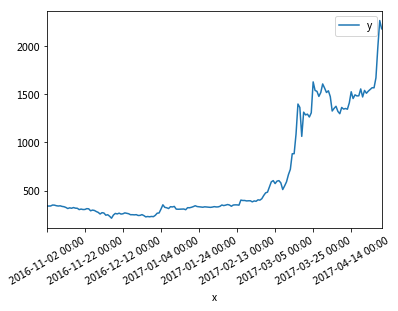

In [108]:
df.plot(kind='line',rot=30)

In [110]:
df['mvg7']= df['y'].rolling(window= 7).mean()

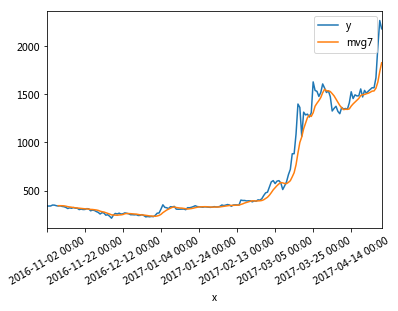

In [112]:
df[['y', 'mvg7']].plot(kind= 'line', rot=30)